<a href="https://colab.research.google.com/github/sanyasana1/Chiselni_methodi/blob/main/%D0%9B%D1%80_2_%D1%96_3_%D0%9B%D0%B0%D0%B7%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9E_%D0%92_%D0%B2%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Знаходження коренів рівняння за допомогою бібліотеки SymPy

In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np
import numdifftools as nd

def f(x):
    return 3*x**4 - 4*x**3 + 2*x**2 - 4*x-1


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-10, 10, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')


Found segment:  [-1, 0]
Found segment:  [1, 2]


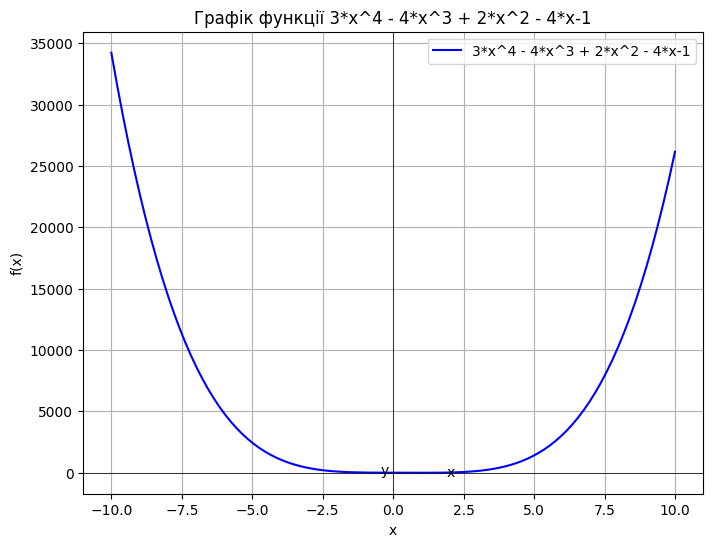

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 3*x**4 - 4*x**3 + 2*x**2 - 4*x-1

# Генерація значень x
x = np.linspace(-10, 10, 100)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='3*x^4 - 4*x^3 + 2*x^2 - 4*x-1', color='blue')
plt.title('Графік функції 3*x^4 - 4*x^3 + 2*x^2 - 4*x-1')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 190, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()


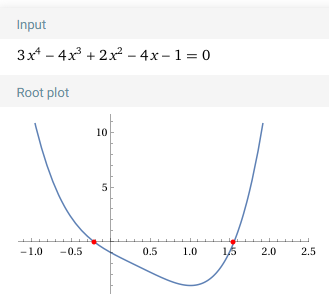

In [ ]:
def rec(a, b, eps):  # метод половинного ділення
    while (np.abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x= ', round(x, 5), '  -   Half division method')


In [ ]:
def hord(a, b, eps):  # метод хорд
    derivative_f = nd.Derivative(f, n=2)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (np.abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Chord method')


In [ ]:
if __name__ == "__main__":
    a1, b1 = -1, 0
    a2, b2 = 1, 2
    eps = 0.0001
    print("Розв'язки на відрізку [-1,0]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [1,2]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)

Розв'язки на відрізку [-1,0]
x=  -0.21524   -   Half division method
x=  -0.21508   -   Chord method

 Розв'язки на відрізку [1,2]
x=  1.54855   -   Half division method
x=  1.54854   -   Chord method


In [ ]:
#Лабораторна робота 3. Метод Ньютона (дотичних). Комбінований метод

import numpy as np
import numdifftools as nd

def f(x):
    return 3*x**4 - 4*x**3 + 2*x**2 - 4*x-1

def nuton(a, b, eps, f):
    df1 = nd.Derivative(f, n=1)   # створюємо callable для 1-ї похідної
    df2 = nd.Derivative(f, n=2)   # і для 2-ї
    xi = b if f(b) * df2(b) > 0 else a

    xi_1 = xi - f(xi) / df1(xi)
    while np.abs(xi_1 - xi) > eps:
        xi = xi_1
        d = df1(xi)
        if d == 0:
            raise ZeroDivisionError("Похідна дорівнює нулю — зупинка.")
        xi_1 = xi - f(xi) / d

    print('Метод Ньютона, x =', round(float(xi_1), 4))

In [ ]:
def komb(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(a)
    if f(a) * df2 > 0:
        a0, b0 = a, b
    else:
        a0, b0 = b, a
    ai, bi = a0, b0

    while np.abs(ai - bi) > eps:
        ai_1 = ai - f(ai) * (bi - ai) / (f(bi) - f(ai))
        bi_1 = bi - f(bi) / nd.Derivative(f, n=1)(bi)
        ai, bi = ai_1, bi_1

    x = (ai_1 + bi_1) / 2

    print('Комбінований метод, x = ', x.round(4))


In [ ]:
if __name__ == "__main__":
    a1, b1 = -1, 0
    a2, b2 = 1, 2
    eps = 0.0001

    print("Розв'язання на відрізку [-1, 0]")
    nuton(a1, b1, eps, f)
    komb(a1, b1, eps, f)
    print("\n Розв'язання на відрізку [1, 2]")
    nuton(a2, b2, eps, f)
    komb(a2, b2, eps, f)

Розв'язання на відрізку [-1, 0]
Метод Ньютона, x = -0.2153
Комбінований метод, x =  -0.2152

 Розв'язання на відрізку [1, 2]
Метод Ньютона, x = 1.5486
Комбінований метод, x =  nan


/tmp/ipython-input-3410986092.py:11: RuntimeWarning: divide by zero encountered in divide
  bi_1 = bi - f(bi) / nd.Derivative(f, n=1)(bi)
/tmp/ipython-input-593851592.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  return 3*x**4 - 4*x**3 + 2*x**2 - 4*x-1
/usr/local/lib/python3.12/dist-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.12/dist-packages/numdifftools/limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))


Завдання 3. Лабораторна робота 3

Тема: Відокремлення дійсних коренів рівнянь та їх уточнення методом простої ітерації.

In [ ]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numdifftools as nd

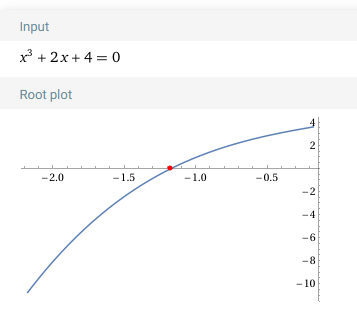

In [ ]:
def f(x: float):
    return x**3 + 2*x + 4

def fprime(x: float):
    return nd.Derivative(f, n=1)

def phi(x: float):
    # c = -0.1 (забезпечує |phi'(x)|<1 на [-2,-0.5])
    return x - 0.1 * f(x)

def iterate_fixed_point(x0: float, iters: int = 5):
    xs = [x0]
    x = x0
    for _ in range(iters):
        x = phi(x)
        xs.append(x)
    return xs

def error_bound(x_last: float) -> float:
    # μ = min_{x∈[-2,-0.5]} |f'(x)| = 2.75
    mu = 2.75
    return abs(f(x_last)) / mu



In [ ]:
def main():
    x0 = -1.0
    iters = 5
    xs = iterate_fixed_point(x0, iters)
    print("Fixed-point iteration for f(x) = x^3 + 2x + 4 with phi(x) = x - 0.1*f(x)")
    print(f"Interval: [-2, -0.5], start x0 = {x0}")
    for i, xi in enumerate(xs):
        if i == 0:
            print(f"x_{i} = {xi:.10f}")
        else:
            print(f"x_{i} = phi(x_{i-1}) = {xi:.10f}")
    bound = error_bound(xs[-1])
    print("\nError bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ")
    print(f"f(x5) = {f(xs[-1]):.10f},  μ = 2.75  ⇒  |ξ - x5| ≤ {bound:.10f}")
    return xs[-1], bound

if __name__ == "__main__":
    root_approx, bound = main()

Fixed-point iteration for f(x) = x^3 + 2x + 4 with phi(x) = x - 0.1*f(x)
Interval: [-2, -0.5], start x0 = -1.0
x_0 = -1.0000000000
x_1 = phi(x_0) = -1.1000000000
x_2 = phi(x_1) = -1.1469000000
x_3 = phi(x_2) = -1.1666591125
x_4 = phi(x_3) = -1.1745340783
x_5 = phi(x_4) = -1.1775967276

Error bound after 5 iterations:  |ξ - x5| ≤ |f(x5)| / μ
f(x5) = 0.0117930622,  μ = 2.75  ⇒  |ξ - x5| ≤ 0.0042883863


In [ ]:
def f(x):
    return x**3 + 2*x + 4

def phi(x):
    return x - 0.1 * f(x)   # c = -0.1

def fixed_point(x0=-1.0, iters=5):
    xs = [x0]
    for _ in range(iters):
        xs.append(phi(xs[-1]))
    return xs

# Запуск і вивід результатів
xs = fixed_point(-1.0, 5)

for i, xi in enumerate(xs):
    print(f"x_{i} = {xi:.10f}")

# Похибка методу простої ітерації після 5-ї ітераціїs
mu = 2.75                     # μ = min_{[-2,-0.5]} |3x^2 + 2| = 2.75
err_bound = abs(f(xs[-1]))/mu
print(f"\nОцінка похибки: |ξ - x5| ≤ {err_bound:.10f}")

x_0 = -1.0000000000
x_1 = -1.1000000000
x_2 = -1.1469000000
x_3 = -1.1666591125
x_4 = -1.1745340783
x_5 = -1.1775967276

Оцінка похибки: |ξ - x5| ≤ -0.0100145740
